# Modflow Post-Proccessing Exercise



##### Thank you for taking the time to walk through this MODFLOW exercise with us. 
##### The purpose is to evaluate your python skills to work with a MODFLOW model (updating packages, manipulating model data, post-processing results)
##### You will be using the Freyberg MODFLOW-NWT model located here: `../data/Freyberg_transient`

- Assume the model units are in meters and days.
- Feel free to clone this repo if that's easier.
- Feel free to use online resources to check functions (for example Flopy documentation).
- While we care more about correct results than style, if time allows, please make figures look professional.

### Importing our python libraries:

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import flopy
import platform
%matplotlib inline 

### Importing our modflow executable:

In [2]:
if "window" in platform.platform().lower():
    mf_exe = os.path.join("..","bin", "win",'mfnwt.exe')
elif "linux" in platform.platform().lower():
    mf_exe = os.path.join("..","bin", "linux",'mfnwt')
elif 'mac'in platform.platform().lower():
    mf_exe = os.path.join("..","bin", "mac",'mfnwt')
mf_exe

'..\\bin\\win\\mfnwt.exe'

### Loading our model using FloPy:

In [3]:
model_ws = os.path.join('..','data','Freyberg_transient')
mf = flopy.modflow.Modflow.load('freyberg.nam',model_ws=model_ws,version='mfnwt',check=False,exe_name=mf_exe)

### Question 1. Plotting Hydraulic Conductivity

Plot a colormap of the hydraulic conductivity in all three model layers. Please show a colorbar and label units.

__Hint__: the hydraulic conductivity is stored in the UPW package

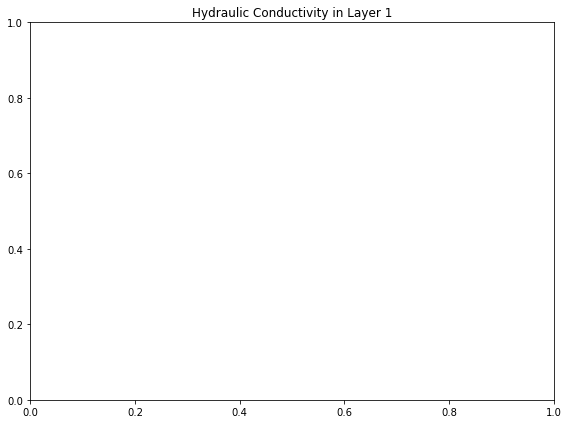

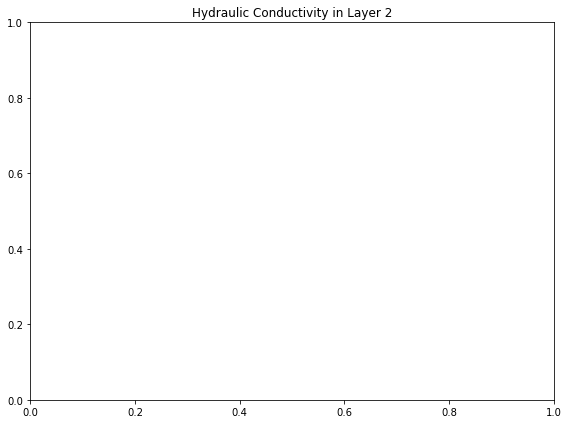

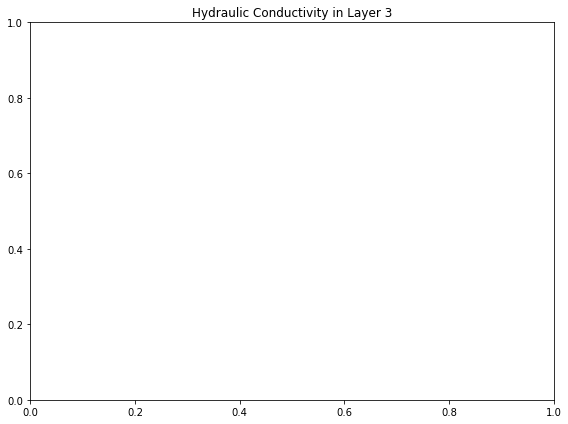

In [76]:
nlay = mf.dis.nlay
hk = mf.upw.hk.array
for lay in range(nlay):
    fig, ax = plt.subplots(figsize=(8,6))
    ### write your code here

    
    ax.set_title(f'Hydraulic Conductivity in Layer {lay+1}')
    fig.tight_layout()
    

### Question 2. Plotting Hydrographs

Plot a hydrograph for each well in `df` for the entire model simulation time.

__Hint:__ Output heads are stored in the binary file freyberg.hds. Use the flopy function for reading such files - 
`flopy.utils.HeadFile()`

In [81]:
# Here is a dataframe of the four wells we're interested in:

df = pd.DataFrame({'wellid': ['MW1', 'MW2', 'MW5', 'PW6'],
                   'layer': [1, 1, 1, 1],
                   'row': [9, 24, 18, 34],
                   'column': [9, 7, 16, 12],
                   'top_screen':[10,13.5,9.825,-15],
                   'bot_screen':[7.5,10,6.425,-20]})

df

,wellid,layer,row,column,top_screen,bot_screen
0,MW1,1,9,9,10.000,7.500
1,MW2,1,24,7,13.500,10.000
2,MW5,1,18,16,9.825,6.425
3,PW6,1,34,12,-15.000,-20.000


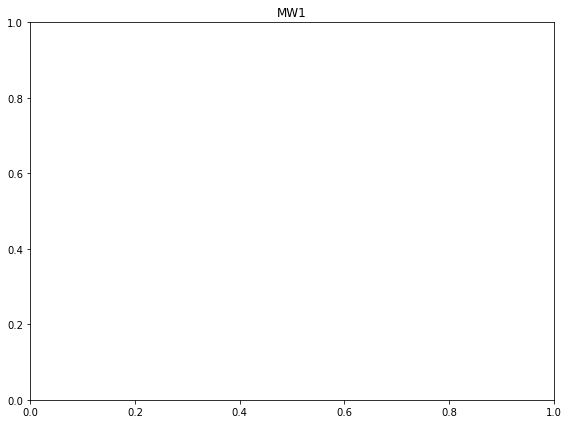

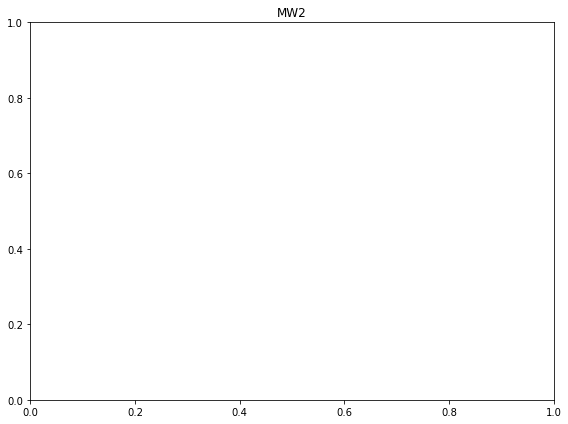

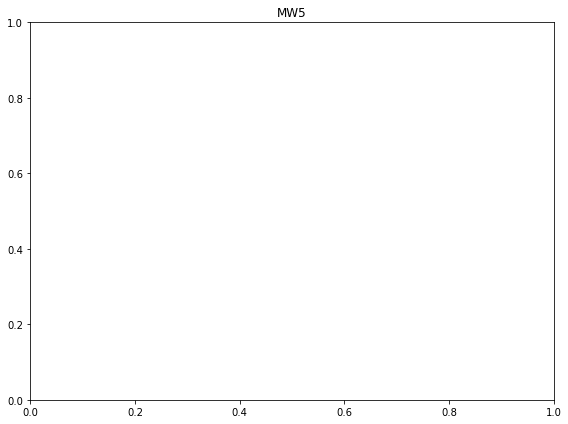

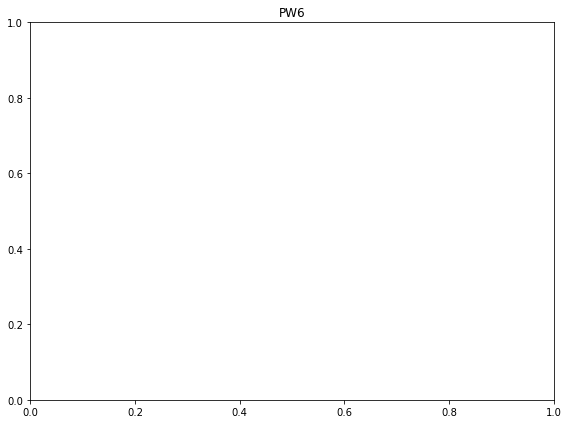

In [79]:
hdsobj = flopy.utils.HeadFile(os.path.join(model_ws,'freyberg.hds'))
start_datetime = pd.to_datetime(mf.modeltime.start_datetime)

for i, dfrow in df.iterrows():
    l, r, c = dfrow['layer'], dfrow['row'], dfrow['column']

    fig, ax = plt.subplots(figsize=(8,6))
    ### write your code here

    
    ###
    ax.set_title(dfrow['wellid'])
    fig.tight_layout()

## Question 3A: Modifying a Pumping Well

Increase pumping at well __PW6__ by __25%__ for all stress periods by modifying the wellfile and then re-run the model in this directory: `../data/Freyberg_transient_25`


In [87]:
# Well PW6:
df.loc[df.wellid == 'PW6']

,wellid,layer,row,column,top_screen,bot_screen
3,PW6,1,34,12,-15.0,-20.0


In [91]:
model_ws2 = os.path.join('..', 'data', 'Freyberg_transient_25') #new model directory
mf2 = flopy.modflow.Modflow.load('freyberg.nam',model_ws=model_ws,version='mfnwt',check=False,exe_name=mf_exe)
wel = mf2.wel
spd = wel.stress_period_data.data
spd[0] #an example of what the stress period data looks like 

rec.array([(0,  8, 15, -0.), (0, 10, 12, -0.), (0, 19, 13, -0.),
           (0, 25,  9, -0.), (0, 28,  5, -0.), (0, 33, 11, -0.)],
          dtype=[('k', '<i4'), ('i', '<i4'), ('j', '<i4'), ('flux', '<f4')])

In [93]:
# Hint: modify the wel stress period data (spd) by increaseing the flux by 25% for well PW6

nper = mf2.dis.nper
for sp in range(nper):
    ### write your code here
    spd[sp]


    ###
    
wel2 = flopy.modflow.ModflowWel(mf2,stress_period_data=spd,dtype=spd[0].dtype)

In [ ]:
mf2.change_model_ws(model_ws2)
mf2.write_input()
mf2.run_model()

## Question 3B: Calculating Drawdown
Calculate the drawdown in each well due to the increase in pumping in well __P6__ (question 3A) and plot it.

In [ ]:
hdsobj = flopy.utils.HeadFile(os.path.join(model_ws,'freyberg.hds'))
hdsobj2 = flopy.utils.HeadFile(os.path.join(model_ws2,'freyberg.hds'))

start_datetime = pd.to_datetime(mf.modeltime.start_datetime)
for i, dfrow in df.iterrows():
    l, r, c = dfrow['layer'], dfrow['row'], dfrow['column']

    fig, ax = plt.subplots(figsize=(8,6))
    ### write your code here


    ###
    ax.set_title(f"Drawdown in {dfrow['wellid']}")
    ax.set_xlim([pd.to_datetime('01/01/2015'),pd.to_datetime('01/01/2016')])
    fig.tight_layout()